# Migration and population structure

The genomic transmission graph can be broken down into many local subpopulations that together make up a metapopulation.  Here we examine a local subpopulation that is embedded within a much larger metapopulation.  

$m$ is the probability that a host within the local subpopulation acquired their infection from the metapopulation, and the number of such hosts per generation is $N_m$ = $mN_h$. These could be immigrants from the metapopulation or local residents who have been travelling outside the local area. 

We must modify our Markov chain simulation of coalescence times to account for migration.  Within `coalestr` this is split this into two components, with one [transmission probability matrix for the subpopulation](https://d-kwiat.github.io/gtg/subpop-matrix.html) and another [transition probability matrix for the metapopulation](https://d-kwiat.github.io/gtg/transition-probability.html).

In `coalestr` we can examine the effects of migration within a hierarchical population structure as follows:

1. We [create a metapopulation](create-metapopulation.ipynb) by specifying its transmission history
 * pass this to `coalestr.Population()` and give the metapopulation a name
 * run `get_coalescent()` for the metapopulation
 * run `get_diversity` for the metapopulation
 

2. We then [create a subpopulation](create-subpopulation.ipynb) by specifying its transmission history and the number of migrant hosts per generation, $N_m$.
 * pass to `coalestr.Population()` the transmission history and the name of the metapopulation
 * run `get_coalescent()` for the subpopulation
 * run `get_diversity` for the subpopulation
 
$F_{ST}$ is automatically calculated and returned as an attribute of the subpopulation.

In [ ]:
!pip install coalestr
from coalestr import cs
import matplotlib.pyplot as plt

In [2]:
import coalestr as cs

In [3]:
# define the metapopulation

metapop_history = [[100000, 3000, 10, 1, 0]]
metapop = cs.Population(metapop_history)
metapop.get_coalescent()
metapop.get_diversity()

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0              99.7      99.7     16867.3  15476.3
Observation time.  Nucleotide diversity     Haplotype homozygosity
                      beho       wiho           beho       wiho
        0           3.71e-04   3.40e-04       4.41e-03   8.47e-02


In [5]:
# define the subpopulation

Nm_list = [0, 0.1, 1, 10, 30]

duration = 1000
Nh = 30
Q = 10
X = 0.5

for Nm in Nm_list:
    subpop_history = [[duration, Nh, Q, X, Nm]]

    subpop = cs.Population(subpop_history, metapopulation = metapop)
    subpop.get_coalescent(show = False)
    subpop.get_diversity(show = False)
    beho_nuc_div = subpop.diversity[0,1]
    beho_hap_hom = subpop.diversity[0,3]
    fst = subpop.diversity[0,6]
    print("Nm = {0:4.2f}: nuc div = {1:.2e}, hap hom = {2:4.2f}, Fst = {3:4.2f}".format(
        Nm,
        beho_nuc_div,
        beho_hap_hom,
        fst))

Nm = 0.00: nuc div = 2.42e-06, hap hom = 0.41, Fst = 0.99
Nm = 0.10: nuc div = 1.54e-04, hap hom = 0.32, Fst = 0.59
Nm = 1.00: nuc div = 3.26e-04, hap hom = 0.10, Fst = 0.12
Nm = 10.00: nuc div = 3.67e-04, hap hom = 0.01, Fst = 0.01
Nm = 30.00: nuc div = 3.70e-04, hap hom = 0.01, Fst = 0.00


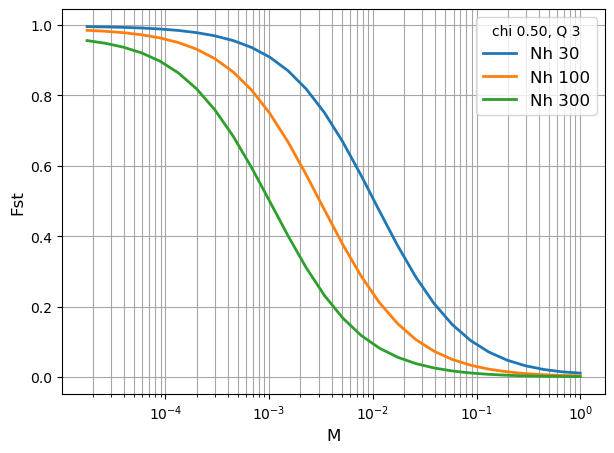

In [11]:
# define a set of subpopulations with different values of Nh

N_list = [30, 100, 300]
Q = 3
chi = 0.5
duration = 10000

iterations = 28

fig, ax = plt.subplots(figsize=(7,5))

for i in range(len(N_list)):
    
    Nh = N_list[i]
    M_list = []
    Fst = []
    
    for j in range(iterations):
    
        M = 1.5 ** (-j)
        Nm = Nh * M
        subpop_history = [[duration, Nh, Q, chi, Nm]]
    
        subpop = cs.Population(subpop_history, metapopulation = metapop)
        subpop.get_coalescent(show = False)
        subpop.get_diversity(show = False)
    
        M_list.append(M)
        Fst.append(subpop.diversity[0, 6])
        
    ax.plot(M_list, Fst, linewidth = 2, label = 'Nh {0:.0f}'.format(Nh))
        
ax.legend(title = 'chi {0:.2f}, Q {1:.0f}'.format(chi, Q), frameon=True, fontsize=12)
ax.set_xlabel("M", fontsize=12)
ax.set_ylabel("Fst", fontsize=12)
ax.set_xscale('log',base=10)
ax.grid(visible=True, which='both', color='0.65', linestyle='-')

plt.show()